In [1]:
from sklearn import datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import KFold
from sklearn import metrics
import pandas as pd
import seaborn as sns

# Load data

In [2]:
data = datasets.load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris["target"] = data.target

In [3]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Explore data

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


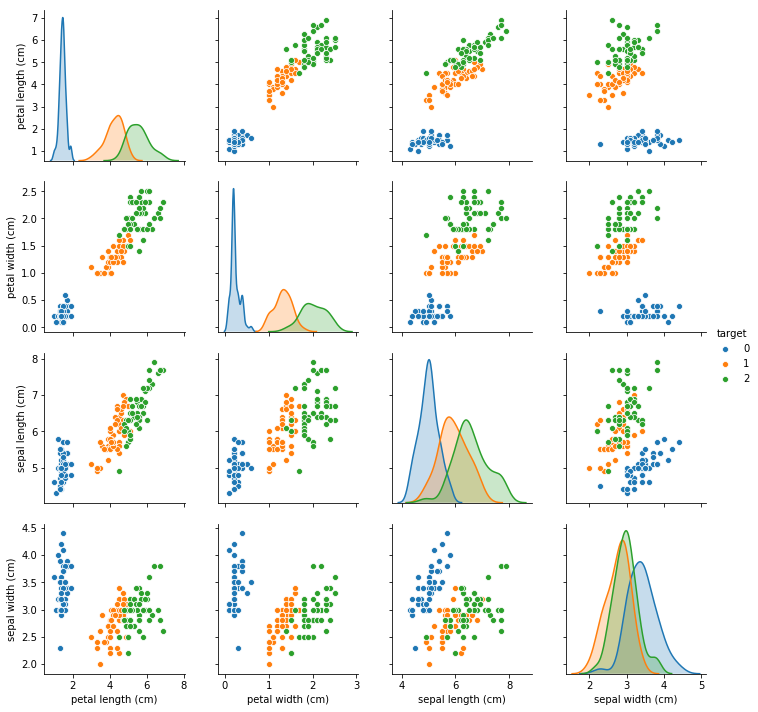

In [4]:
show_features = ["petal length (cm)", "petal width (cm)", "sepal length (cm)", "sepal width (cm)"]
sns.pairplot(data=iris, hue="target", x_vars=show_features, y_vars=show_features)

由上圖我們可以知道 "petal length (cm)" 及 "petal width (cm)" 在資料的分佈上可以將不同的類別分開，所以他們作為特徵有利於分類問題。

所以我們使用這兩個特徵來訓練模型，先採用最簡單的線性模型 LinearSVC

In [5]:
selected_features = ["petal length (cm)", "petal width (cm)"]

採取 5-fold CV，每次的訓練資料約為120筆，已經足夠訓練好線性模型

In [6]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = LinearSVC(random_state=0)

In [7]:
accuracies = []
confmats = []
for train, test in k_fold.split(iris["target"]):
    trained = model.fit(iris.loc[train, selected_features].values, iris.loc[train, "target"].values)
    X_test = iris.loc[test, selected_features].values
    y_test = iris.loc[test, "target"].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

模型準確度為：

In [8]:
accuracies

[0.8666666666666667,
 0.9,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333]

隨意挑3個 confusion matrix 來看：

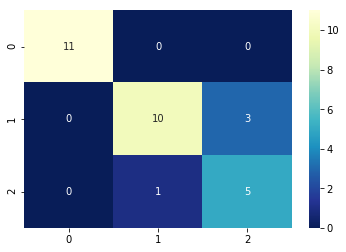

In [9]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")

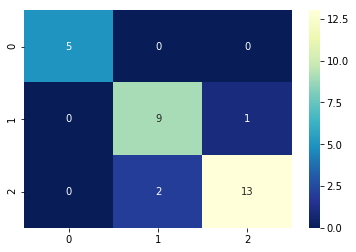

In [10]:
sns.heatmap(confmats[1], cmap="YlGnBu_r", annot=True, fmt="d")

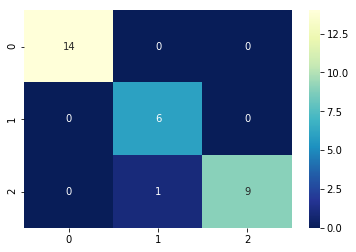

In [11]:
sns.heatmap(confmats[3], cmap="YlGnBu_r", annot=True, fmt="d")

整體分類模型上有一定的準確率，我們看看能不能做的更好。

我們可以試著造出更多新的特徵，這些特徵要有一定的物理意義：

In [12]:
iris["petal area"] = iris["petal length (cm)"] * iris["petal width (cm)"]
iris["sepal area"] = iris["sepal length (cm)"] * iris["sepal width (cm)"]
iris["petal ratio"] = iris["petal length (cm)"] / iris["petal width (cm)"]
iris["sepal ratio"] = iris["sepal length (cm)"] / iris["sepal width (cm)"]

看看新的特徵對於分類問題潛在的效果：

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


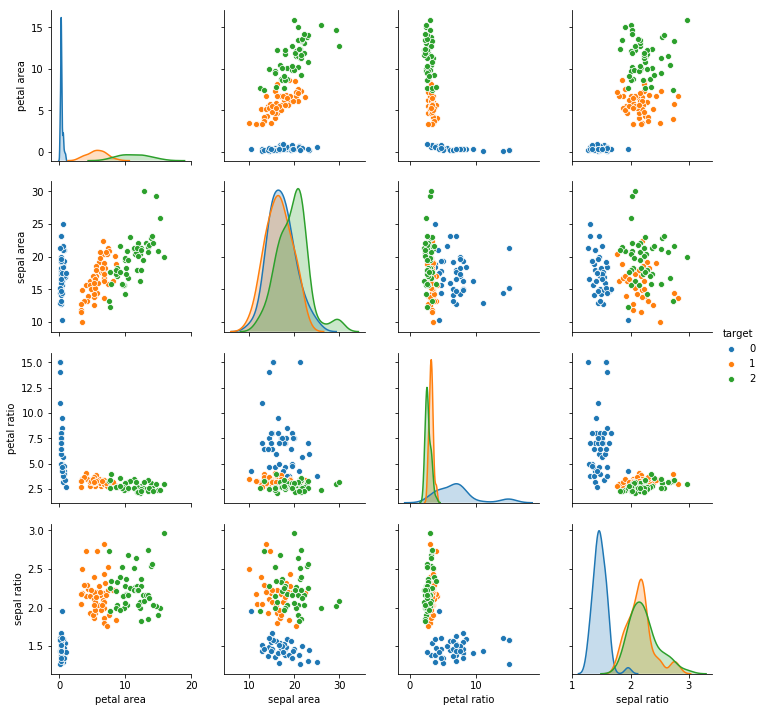

In [13]:
show_features = ["petal area", "sepal area", "petal ratio", "sepal ratio"]
sns.pairplot(data=iris, hue="target", x_vars=show_features, y_vars=show_features)

類別1跟類別2是以往分不好的，所以我們需要挑選可以將類別1跟類別2分好的特徵。我們還可以利用以下方式造出其他特徵：

In [14]:
iris["p/s length ratio"] = iris["petal length (cm)"] / iris["sepal length (cm)"]
iris["p/s width ratio"] = iris["petal width (cm)"] / iris["sepal width (cm)"]

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


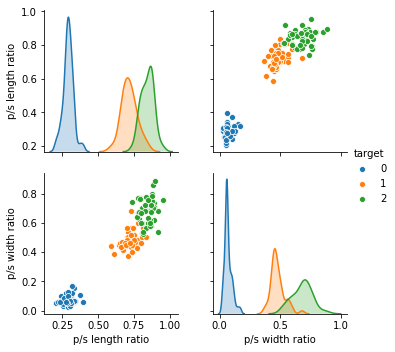

In [15]:
show_features = ["p/s length ratio", "p/s width ratio"]
sns.pairplot(data=iris, hue="target", x_vars=show_features, y_vars=show_features)

我們再次挑選特徵，這些特徵都是儘量可以將三種類別分好的特徵：

In [16]:
selected_features = ["petal length (cm)", "petal width (cm)", "petal area", "petal ratio",
                     "p/s length ratio", "p/s width ratio"]

使用與先前相同的模型，但是不同的特徵，這樣可以看挑選特徵的好壞。

In [17]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
model = LinearSVC(random_state=0)

In [18]:
accuracies = []
confmats = []
for train, test in k_fold.split(iris["target"]):
    trained = model.fit(iris.loc[train, selected_features].values, iris.loc[train, "target"].values)
    X_test = iris.loc[test, selected_features].values
    y_test = iris.loc[test, "target"].values
    accuracies.append(trained.score(X_test, y_test))
    y_pred = model.predict(X_test)
    confmats.append(metrics.confusion_matrix(y_test, y_pred))

在準確率上有較先前的版本進步，達到幾乎完美的地步。

In [19]:
accuracies

[0.9666666666666667, 0.9, 1.0, 1.0, 0.9333333333333333]

挑選沒做好的3個模型的 confusion matrix 來看。

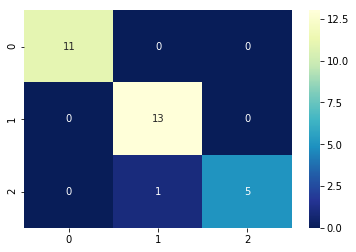

In [20]:
sns.heatmap(confmats[0], cmap="YlGnBu_r", annot=True, fmt="d")

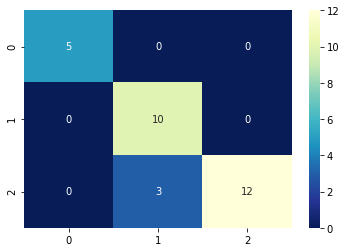

In [21]:
sns.heatmap(confmats[1], cmap="YlGnBu_r", annot=True, fmt="d")

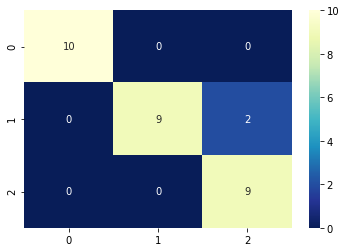

In [22]:
sns.heatmap(confmats[4], cmap="YlGnBu_r", annot=True, fmt="d")

# Conclusion

以最簡單的線性模型，建立分類模型，把特徵加以組合的方式可以達成近乎完美的分類效果。簡單的模型在預測時期可以非常高效，也避免了 overfitting。